In [45]:
# This is a small dataset and we will try to only visualise it in different inferring ways
#  Dataset Information: Data is from 22 Jan 2020 to 20 April 2020. It has 9 columns. Here, the final 3 parameters are Cured, Deaths and Confirmed. Out of these 3 
# parameters, accornig to the need, anyone can be considered as the output while building a prediction model. It all depends
# on the requirement, what exactly we want. I have tried to present a general visualization to get a summarized conlusions.

In [10]:
# import bsic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
# load the dataset
df = pd.read_csv("d:/covid_19_india.csv")
df.head(2)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1


In [5]:
df.shape

(1157, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 9 columns):
Sno                         1157 non-null int64
Date                        1157 non-null object
Time                        1157 non-null object
State/UnionTerritory        1157 non-null object
ConfirmedIndianNational     1157 non-null object
ConfirmedForeignNational    1157 non-null object
Cured                       1157 non-null int64
Deaths                      1157 non-null int64
Confirmed                   1157 non-null int64
dtypes: int64(4), object(5)
memory usage: 81.5+ KB


In [7]:
df.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [44]:
df['Date'].describe() # Data consists of case studies from 82 dates, wkith maxim data of 20th April 2020, as comapred to other
# dates (33 entries)

count         1157
unique          82
top       20/04/20
freq            33
Name: Date, dtype: object

In [48]:
df[df['Date']=='20/04/20'].shape

(33, 9)

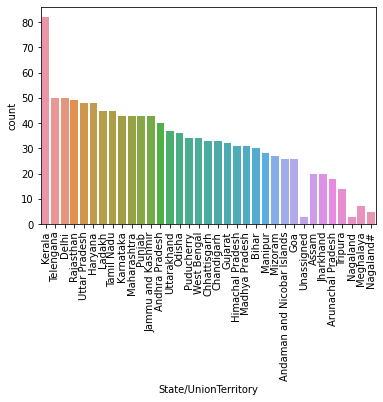

In [31]:
# State wise number of case studies
x=sb.countplot(df['State/UnionTerritory'])
x.set_xticklabels(df['State/UnionTerritory'].unique(), rotation=90)
plt.show()

In [17]:
# Maximum case studies are from Kerala State, Minimum case studies are from Nagaland and one unassigned state 

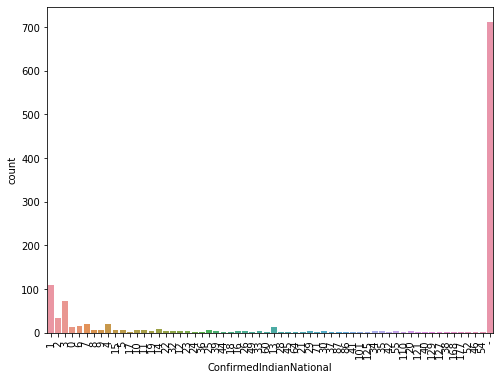

In [33]:
# Cases of Confirmed Indian Nationals
plt.figure(figsize=(8,6))
x = sb.countplot(df['ConfirmedIndianNational'])
x.set_xticklabels(df['ConfirmedIndianNational'].unique(), rotation=90)
plt.show()

In [35]:
# It shows that most of the cases do not have the info whether they are indian or foriegners. 
# Over all cases are 1157 out of which unidentified cases on the basis of nationality are 711 so over 82% cases has either
# no information about their nationality provied or it is not documented
# This is the same case with ConfirmedForeignNational

In [63]:
# In such case, when required, the '-' from ConfirmedIndianNational and ConfirmedForiegnNational can be replaced by Null values
# by the following code
df[['ConfirmedIndianNational','ConfirmedForeignNational']] = df[['ConfirmedIndianNational','ConfirmedForeignNational']].replace(['-','na'], np.nan)
# It can also be rplaces by ther required values.

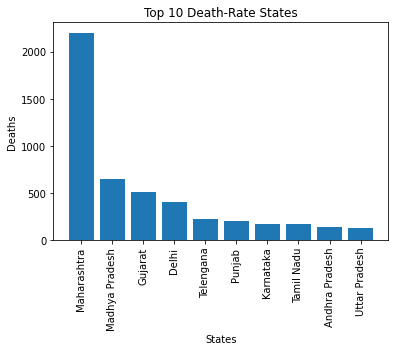

In [40]:
# Top 10 States with maximum Deaths
sr_high =df.groupby('State/UnionTerritory')['Deaths'].sum().sort_values(ascending=False).head(10)
plt.bar(sr_high.index,sr_high.values)
plt.title("Top 10 Death-Rate States")
plt.xlabel("States")
plt.xticks(rotation=90)
plt.ylabel("Deaths")
plt.show()

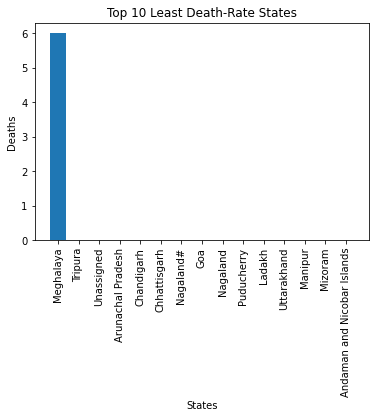

In [42]:
# Top 15 States with minimum Deaths
sr_high =df.groupby('State/UnionTerritory')['Deaths'].sum().sort_values(ascending=False).tail(15)
plt.bar(sr_high.index,sr_high.values)
plt.title("Top 10 Least Death-Rate States")
plt.xlabel("States")
plt.xticks(rotation=90)
plt.ylabel("Deaths")
plt.show()
# we see that in this list, 14 states have no deaths reported so far

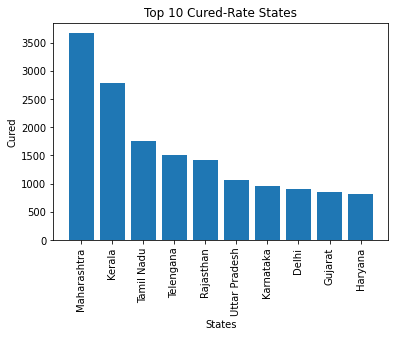

In [50]:
# Top 10 States with maximum Cured
sr_high =df.groupby('State/UnionTerritory')['Cured'].sum().sort_values(ascending=False).head(10)
plt.bar(sr_high.index,sr_high.values)
plt.title("Top 10 Cured-Rate States")
plt.xlabel("States")
plt.xticks(rotation=90)
plt.ylabel("Cured")
plt.show()

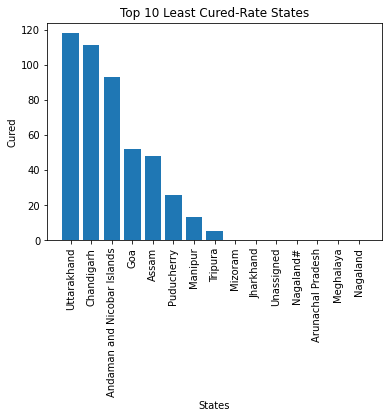

In [51]:
# Top 15 States with minimum Cured
sr_high =df.groupby('State/UnionTerritory')['Cured'].sum().sort_values(ascending=False).tail(15)
plt.bar(sr_high.index,sr_high.values)
plt.title("Top 10 Least Cured-Rate States")
plt.xlabel("States")
plt.xticks(rotation=90)
plt.ylabel("Cured")
plt.show()

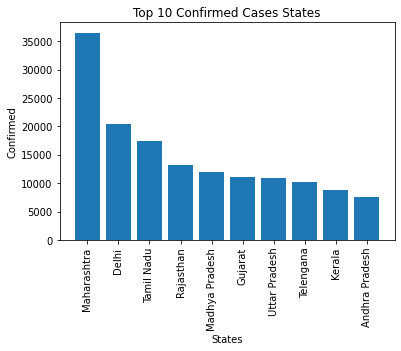

In [55]:
# Top 10 States with maximum Confirmed Cases
sr_high =df.groupby('State/UnionTerritory')['Confirmed'].sum().sort_values(ascending=False).head(10)
plt.bar(sr_high.index,sr_high.values)
plt.title("Top 10 Confirmed Cases States")
plt.xlabel("States")
plt.xticks(rotation=90)
plt.ylabel("Confirmed")
plt.show()

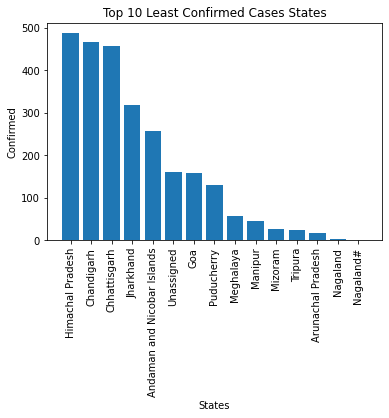

In [54]:
# Top 15 States with minimum Confirmed Cases
sr_high =df.groupby('State/UnionTerritory')['Confirmed'].sum().sort_values(ascending=False).tail(15)
plt.bar(sr_high.index,sr_high.values)
plt.title("Top 10 Least Confirmed Cases States")
plt.xlabel("States")
plt.xticks(rotation=90)
plt.ylabel("Confirmed")
plt.show()

In [59]:
# A combined vsiualization of 'Confirmed','Cured','Deaths' for all the states
df_ccd = df.groupby('State/UnionTerritory')['Confirmed','Cured','Deaths'].sum()
df_ccd.columns

Index(['Confirmed', 'Cured', 'Deaths'], dtype='object')

<Figure size 576x432 with 0 Axes>

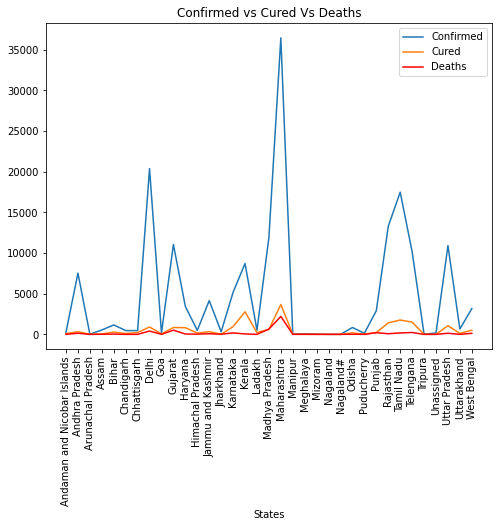

In [60]:
plt.figure(figsize=(8,6))
plt.plot(df_ccd.index,df_ccd['Confirmed'],label="Confirmed")
plt.plot(df_ccd.index,df_ccd['Cured'],label="Cured")
plt.plot(df_ccd.index,df_ccd['Deaths'],label="Deaths",color='r')
plt.title("Confirmed vs Cured Vs Deaths")
plt.xlabel("States")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [64]:
# Let us visualize state wise Indian vs Foreign Cases
# Get the data
df_ct = df[['State/UnionTerritory','ConfirmedIndianNational','ConfirmedForeignNational']]
df_ct.head(2)

,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational
0,Kerala,1,0
1,Kerala,1,0


In [65]:
# Drop the null values (the unidentified cases)
df_ct = df_ct.dropna(axis=0)
df_ct['ConfirmedIndianNational'] = df_ct['ConfirmedIndianNational'].astype('int64')
df_ct['ConfirmedForeignNational'] = df_ct['ConfirmedForeignNational'].astype('int64')
type(df_ct)

pandas.core.frame.DataFrame

In [66]:
# Group them by states and nationality
df_if = df_ct.groupby('State/UnionTerritory')['ConfirmedIndianNational','ConfirmedForeignNational'].sum()
df_if.head()

,ConfirmedIndianNational,ConfirmedForeignNational
State/UnionTerritory,,
Andaman and Nicobar Islands,8,0
Andhra Pradesh,81,0
Bihar,32,0
Chandigarh,50,0
Chhattisgarh,25,0


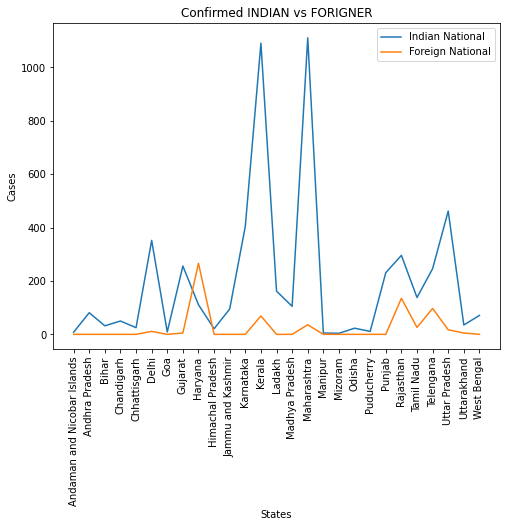

In [67]:
# Plot
plt.figure(figsize=(8,6))
plt.plot(df_if.index,df_if['ConfirmedIndianNational'],label="Indian National")
plt.plot(df_if.index,df_if['ConfirmedForeignNational'],label="Foreign National")
plt.title("Confirmed INDIAN vs FORIGNER")
plt.xlabel("States")
plt.ylabel("Cases")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [68]:
# Let us visualize state wise confirmed vs Death graph
# Convert dates in datetime format and appropriate format
df['Dates']=pd.to_datetime(df['Date'])
df['Dates'] = df['Dates'].dt.strftime('%d-%m-%y')
df['Month'] = pd.to_datetime(df['Dates']).dt.month

In [69]:
# Group them
df_mn = df[['Month','Confirmed','Deaths']]
df_mnn = df_mn.groupby('Month')['Confirmed','Deaths'].sum()

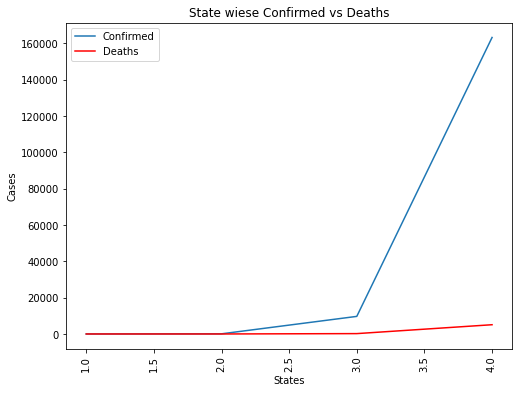

In [70]:
# plot
plt.figure(figsize=(8,6))
plt.plot(df_mnn.index,df_mnn['Confirmed'],label="Confirmed")
plt.plot(df_mnn.index,df_mnn['Deaths'],label="Deaths",color='r')
plt.title("State wiese Confirmed vs Deaths")
plt.xlabel("States")
plt.xticks(rotation=90)
plt.ylabel("Cases")
plt.legend()
plt.show()

In [ ]:
# Example of building a regression model and then Let's plot the regression

In [71]:
df = pd.read_csv("d:/covid_19_india.csv")
df.head(2)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 9 columns):
Sno                         1157 non-null int64
Date                        1157 non-null object
Time                        1157 non-null object
State/UnionTerritory        1157 non-null object
ConfirmedIndianNational     1157 non-null object
ConfirmedForeignNational    1157 non-null object
Cured                       1157 non-null int64
Deaths                      1157 non-null int64
Confirmed                   1157 non-null int64
dtypes: int64(4), object(5)
memory usage: 81.5+ KB


In [74]:
dff = df.drop(['Sno','Time'],axis=1) # not required
dff.head(2)

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,30/01/20,Kerala,1,0,0,0,1
1,31/01/20,Kerala,1,0,0,0,1


In [75]:
from sklearn.preprocessing import LabelEncoder # for encoding
le=LabelEncoder()

In [76]:
dff['State/UnionTerritory'] = le.fit_transform(dff['State/UnionTerritory']) # encode

In [263]:
dff['ConfirmedIndianNational'].unique()

array(['1', '2', '3', '0', '6', '7', '8', '9', '4', '15', '5', '17', '10',
       '11', '19', '14', '22', '32', '12', '23', '24', '36', '25', '39',
       '44', '18', '16', '26', '49', '33', '60', '13', '28', '45', '64',
       '21', '29', '71', '30', '37', '87', '86', '41', '101', '125', '34',
       '35', '42', '55', '110', '20', '121', '40', '129', '127', '38',
       '168', '177', '52', '46', '54', '-'], dtype=object)

In [77]:
# Just to plot, we have assigned values to null indian and foreign national values. The logic is, if there is some non null
# value in Confirmd cases, we have assigned half to ConfirmedIndianNational and half to ConfirmedForeignNational
for i in range(dff.shape[0]):
    if (dff['ConfirmedIndianNational'][i]=='-'):
        dff['ConfirmedIndianNational'][i] = (dff['Confirmed'][i]/2)
        dff['ConfirmedForeignNational'][i] = (dff['Confirmed'][i]/2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [78]:
dff['ConfirmedIndianNational'].unique()

array(['1', '2', '3', '0', '6', '7', '8', '9', '4', '15', '5', '17', '10',
       '11', '19', '14', '22', '32', '12', '23', '24', '36', '25', '39',
       '44', '18', '16', '26', '49', '33', '60', '13', '28', '45', '64',
       '21', '29', '71', '30', '37', '87', '86', '41', '101', '125', '34',
       '35', '42', '55', '110', '20', '121', '40', '129', '127', '38',
       '168', '177', '52', '46', '54', 9.5, 4.5, 5.5, 4.0, 3.5, 24.5, 2.5,
       29.0, 16.5, 1.5, 15.5, 38.0, 91.0, 6.5, 15.0, 93.0, 0.5, 19.0,
       27.5, 33.0, 32.5, 9.0, 11.5, 7.5, 43.5, 34.5, 18.0, 24.0, 41.5,
       101.0, 23.5, 99.0, 29.5, 33.5, 35.5, 41.0, 11.0, 23.0, 20.0, 5.0,
       48.5, 36.5, 27.0, 117.0, 108.0, 20.5, 37.0, 39.5, 50.5, 13.0, 8.0,
       76.0, 21.5, 31.0, 120.5, 151.0, 2.0, 21.0, 46.5, 48.0, 51.5, 18.5,
       43.0, 12.0, 109.5, 55.0, 132.5, 49.5, 167.5, 54.0, 53.5, 56.5,
       26.5, 66.0, 14.5, 3.0, 47.5, 37.5, 1.0, 62.0, 143.0, 7.0, 52.0,
       83.5, 154.5, 79.0, 86.0, 31.5, 38.5, 80.5, 222.5

In [79]:
dff['Date'] = pd.to_datetime(dff['Date'])
dff['Date'] = dff['Date'].apply(lambda x: x.strftime('%Y%m%d'))

In [80]:
dff.head(2)

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,20200130,15,1,0,0,0,1
1,20200131,15,1,0,0,0,1


In [81]:
dfi=dff.iloc[:,dff.columns!='Deaths']
dfo=dff['Deaths']

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
lr=LinearRegression()
lr.fit(dfi,dfo)
lr.score(dfi,dfo)

0.7564553920092868

In [87]:
dff['Death_lr'] = lr.predict(dfi)
dff.head(2)

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Death_lr
0,20200130,15,1,0,0,0,1,-1.150056
1,20200131,15,1,0,0,0,1,-1.151166


In [88]:
import matplotlib.pyplot as plt

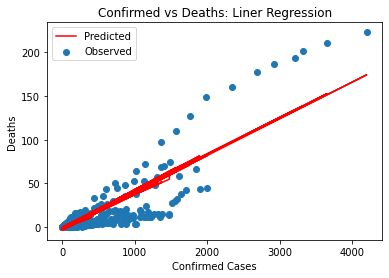

In [89]:
plt.scatter(dff['Confirmed'],dff['Deaths'],label="Observed")
plt.plot(dff['Confirmed'],dff['Death_lr'],color='r',label="Predicted")
plt.title("Confirmed vs Deaths: Liner Regression")
plt.xlabel("Confirmed Cases")
plt.ylabel("Deaths")
plt.legend()
plt.show()

In [100]:
def predictDeath(Dt,St,Cn,Cf,Cu,Cnf):
    print("Predicted Deaths :", lr.predict([[Dt,St,Cn,Cf,Cu,Cnf]]))
    plt.scatter(dff['Confirmed'],dff['Deaths'],label="Observed")
    plt.plot(dff['Confirmed'],dff['Death_lr'],color='r',label="Predicted Plot")
    plt.plot(Cnf,lr.predict([[Dt,St,Cn,Cf,Cu,Cnf]]),color='k',marker="*",label="Predicted Case") # example of prediction
    plt.title("Confirmed vs Deaths: Liner Regression")
    plt.xlabel("Confirmed Cases")
    plt.ylabel("Deaths")
    plt.legend()
    plt.show()

Predicted Deaths : [143.26971106]


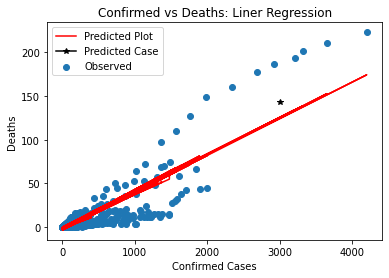

In [101]:
predictDeath(20200431,15,3000,3,0,3003)